# Thông tin sinh viên

- Họ và tên: Đinh Xuân Khương
- MSSV: 23127398
- Lớp: 23CLC04

# Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [5]:
# Đọc dữ liệu  bằng pandas
train = pd.read_csv('p03.train.csv')
test = pd.read_csv('p03.test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [70]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w  

def df_to_numpy(dataframe):
    return dataframe.to_numpy()

def cal_mse(y, y_predicted):
    return np.mean((y - y_predicted)**2)

def plot_compare(y_test, y_predicted):
    step = 20
    plt.plot(y_test[::step], label='y_test', alpha=0.7)
    plt.plot(y_predicted[::step], label='y_predicted', alpha=0.7)

    plt.legend()
    plt.xlabel('Index sample')
    plt.ylabel('Value')
    plt.title('y_test  y_predicted')
    plt.show()
    

def k_fold_cross_validation(X, y, model, k=5):
    """
    X: numpy array, shape (n_samples, n_features)
    y: numpy array, shape (n_samples,)
    model: object có phương thức fit(X_train, y_train) và predict(X_test)
    k: số fold
    """
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  

    fold_sizes = np.full(k, n_samples // k, dtype=int)
    fold_sizes[:n_samples % k] += 1  # chia đều số mẫu dư

    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate((indices[:start], indices[stop:]))

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        # Huấn luyện
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mse = cal_mse(y_val, y_pred)
        scores.append(mse)

        current = stop

    return np.mean(scores)


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu

In [7]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)

X_train shape:  (9000, 5)
Y_train shape:  (9000,)


In [8]:
X_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,77,0,5,2
1,8,90,1,4,1
2,9,83,1,6,3
3,4,52,0,9,5
4,4,82,1,8,6


In [9]:
X_train.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8995,2,41,1,4,6
8996,3,74,1,4,1
8997,7,65,0,4,1
8998,8,48,0,7,7
8999,4,59,0,9,7


In [10]:
y_train.head()

0    69.0
1    84.0
2    82.0
3    38.0
4    68.0
Name: Performance Index, dtype: float64

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9000 non-null   int64
 1   Previous Scores                   9000 non-null   int64
 2   Extracurricular Activities        9000 non-null   int64
 3   Sleep Hours                       9000 non-null   int64
 4   Sample Question Papers Practiced  9000 non-null   int64
dtypes: int64(5)
memory usage: 351.7 KB


In [12]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9000 entries, 0 to 8999
Series name: Performance Index
Non-Null Count  Dtype  
--------------  -----  
9000 non-null   float64
dtypes: float64(1)
memory usage: 70.4 KB


In [13]:
X_train.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.976444,69.396111,0.493667,6.535556,4.590889
std,2.594647,17.369957,0.499988,1.695533,2.864570
min,1.000000,40.000000,0.000000,4.000000,0.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000


In [14]:
y_train.describe()

count    9000.000000
mean       55.136333
std        19.187669
min        10.000000
25%        40.000000
50%        55.000000
75%        70.000000
max       100.000000
Name: Performance Index, dtype: float64

#### Histograms

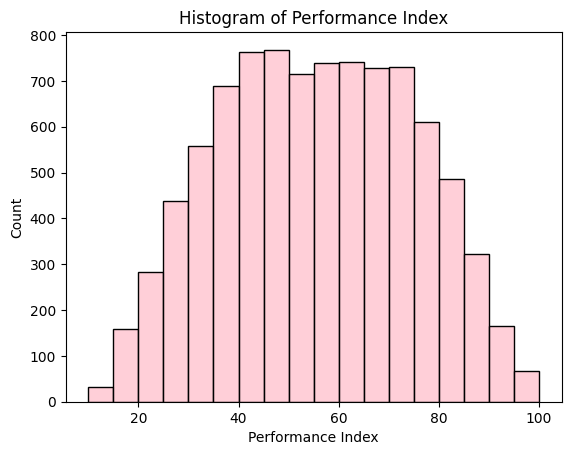

In [15]:
ax = sns.histplot(y_train, binrange=(10,100), binwidth = 5, color= 'pink')
plt.title("Histogram of Performance Index")
plt.show()

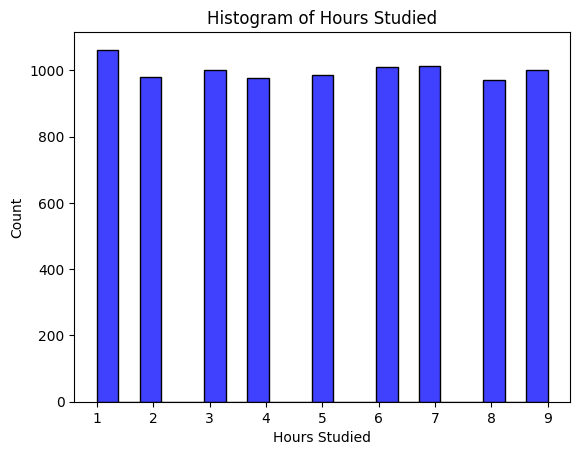

In [16]:
ax = sns.histplot(X_train["Hours Studied"], color= 'blue')
plt.title("Histogram of Hours Studied")
plt.show()

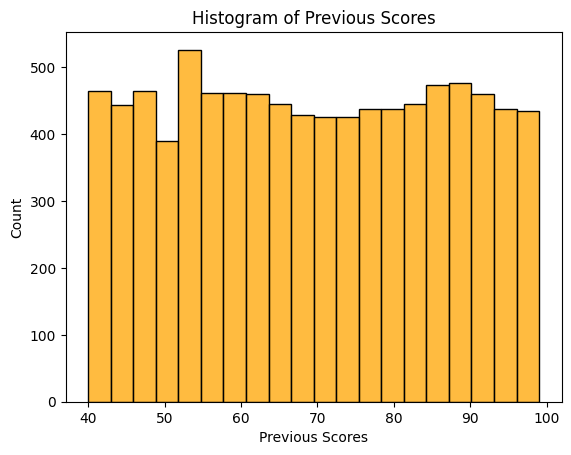

In [17]:
ax = sns.histplot(X_train["Previous Scores"], color= 'orange')
plt.title("Histogram of Previous Scores")
plt.show()

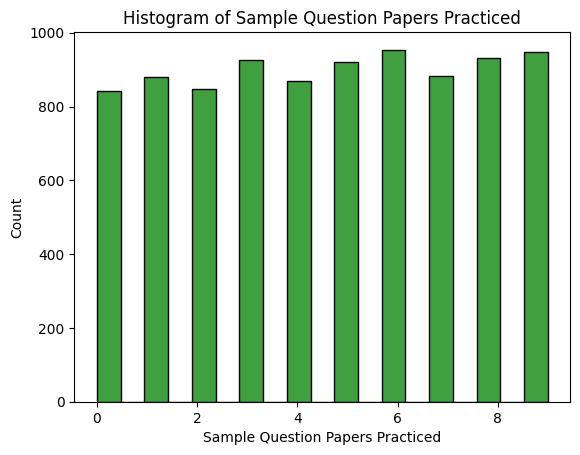

In [18]:
ax = sns.histplot(X_train["Sample Question Papers Practiced"], color= 'green')
plt.title("Histogram of Sample Question Papers Practiced")
plt.show()

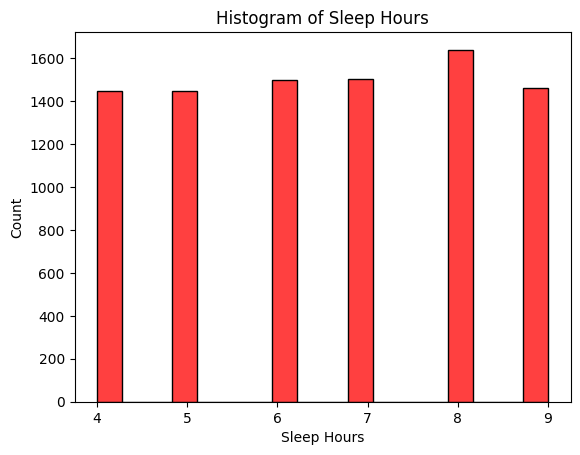

In [19]:
ax = sns.histplot(X_train["Sleep Hours"], color= 'r')
plt.title("Histogram of Sleep Hours")
plt.show()

### The dependency of Performance Index on other features 

#### Hours Studied

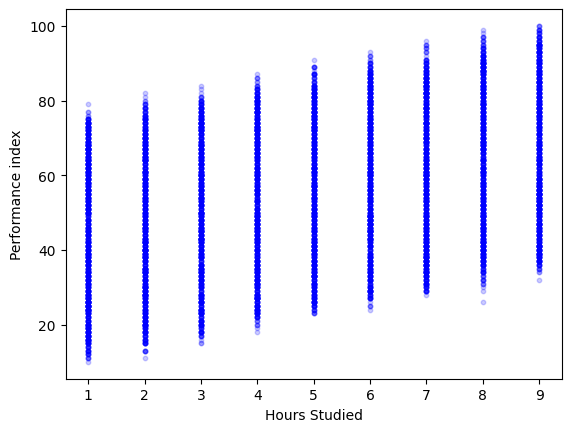

In [20]:
plt.scatter(X_train["Hours Studied"], y_train, color='blue', marker='o', s=10, alpha=0.2)

# Labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Performance index')
plt.show()


#### Previous Scores

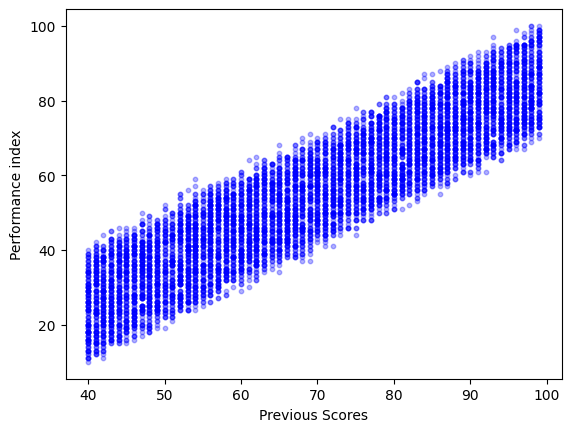

In [21]:
plt.scatter(X_train["Previous Scores"], y_train, color = "b", s = 10, alpha= 0.3)

plt.xlabel('Previous Scores')
plt.ylabel('Performance index')
plt.show()

#### Extracurricular Activities and Hours Studied
Vì Hoạt động ngoại khóa là dữ liệu True/False nên biểu đồ thích hợp nhất có thể dùng là biểu đồ hộp (Box plot)

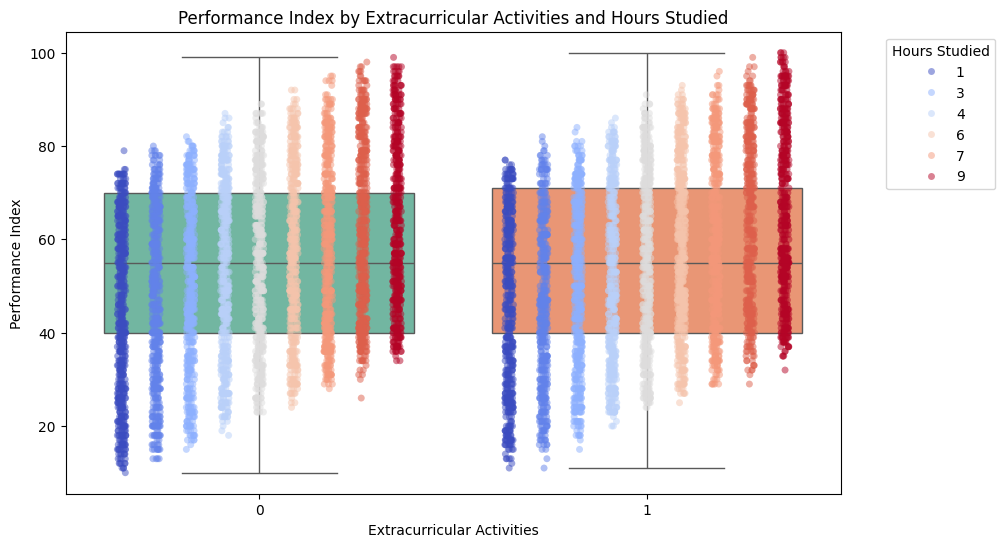

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x="Extracurricular Activities", y="Performance Index", hue="Extracurricular Activities", palette='Set2', legend=False)
sns.stripplot(x='Extracurricular Activities', y='Performance Index', data=train,
              hue='Hours Studied', palette='coolwarm', size=5, jitter=True, dodge=True, alpha=0.5)


plt.title('Performance Index by Extracurricular Activities and Hours Studied')
plt.legend(title='Hours Studied', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

So sánh số lượng phân bố giữa học sinh có tham gia hoạt động ngoại khóa và học sinh không tham gia

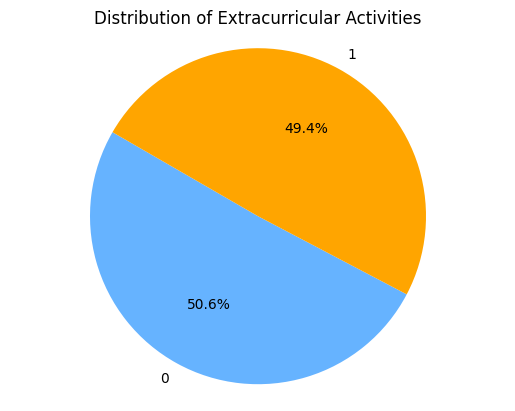

In [42]:
# Count the values
activity_counts = X_train['Extracurricular Activities'].value_counts()

# Create the pie chart
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', colors=['#66b3ff','orange'], startangle=150)
plt.title("Distribution of Extracurricular Activities")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

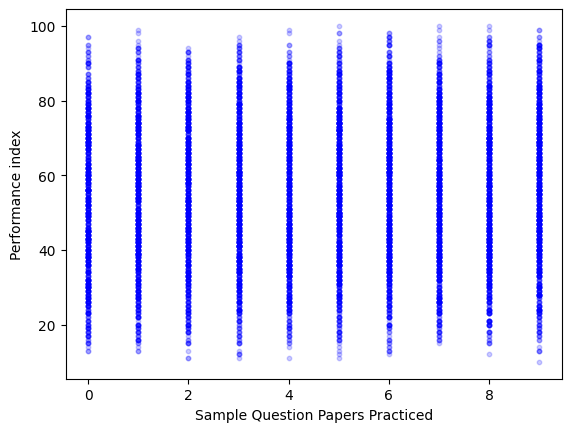

In [24]:
plt.scatter(X_train["Sample Question Papers Practiced"], y_train, color = "b", s = 10, alpha= 0.2)

plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance index')
plt.show()

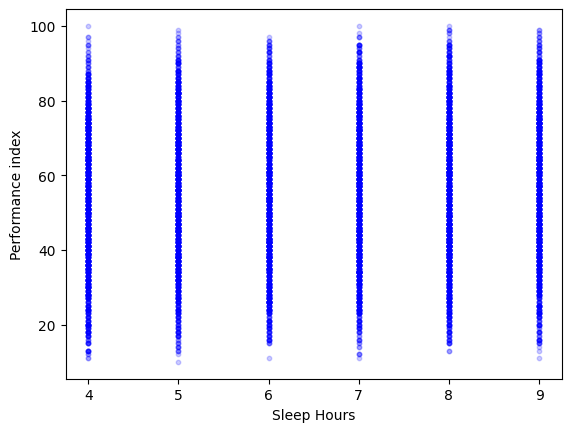

In [25]:
plt.scatter(X_train["Sleep Hours"], y_train, color='blue', marker='o', s=10, alpha=0.2)

# Labels and title
plt.xlabel('Sleep Hours')
plt.ylabel('Performance index')
plt.show()

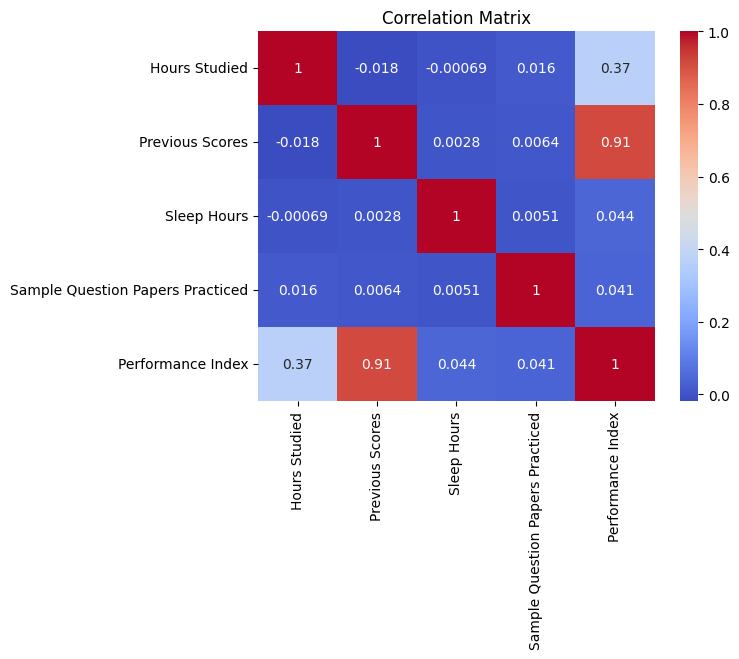

In [26]:
correlation_matrix = train[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

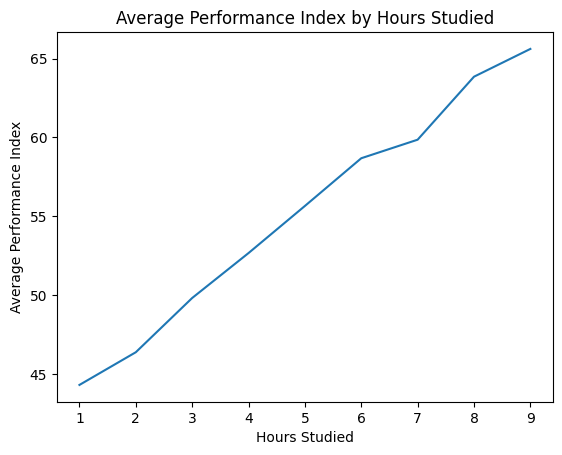

In [27]:
avg_performance_by_hours = train.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

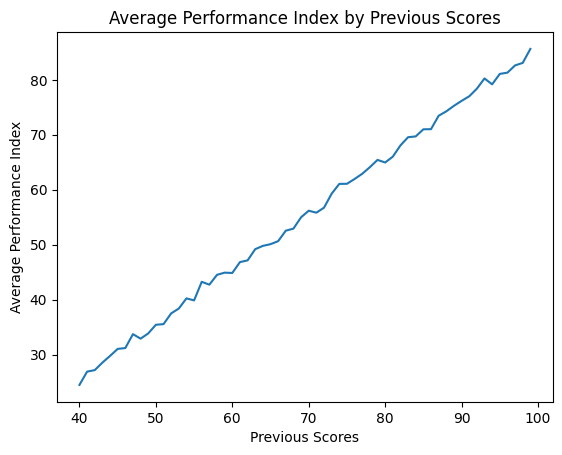

In [28]:
avg_performance_by_previous_score = train.groupby('Previous Scores')['Performance Index'].mean()
plt.plot(avg_performance_by_previous_score.index, avg_performance_by_previous_score.values)
plt.xlabel('Previous Scores')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Previous Scores')
plt.show()

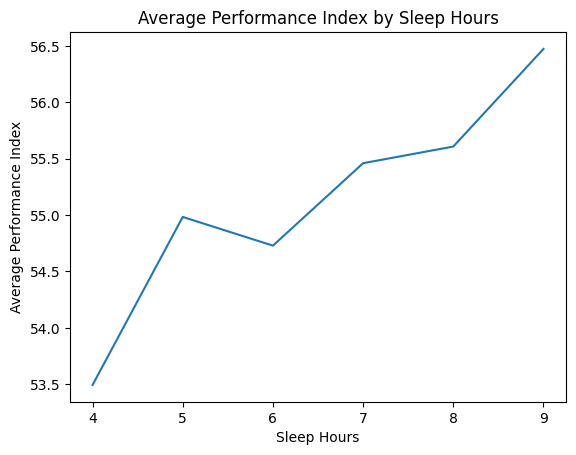

In [29]:
avg_performance_by_sleep_hours = train.groupby('Sleep Hours')['Performance Index'].mean()
plt.plot(avg_performance_by_sleep_hours.index, avg_performance_by_sleep_hours.values)
plt.xlabel('Sleep Hours')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Sleep Hours')
plt.show()

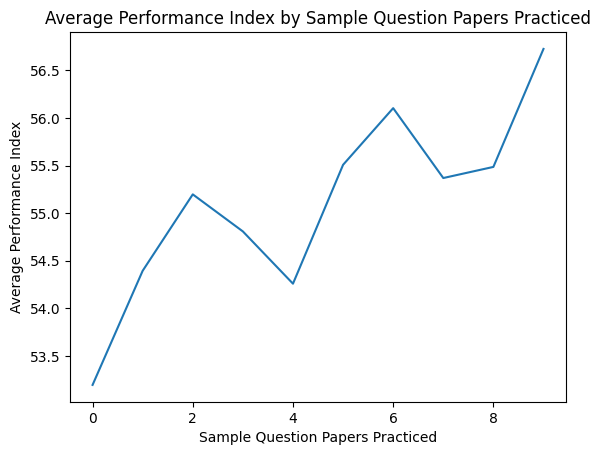

In [30]:
avg_performance_by_sample_papers = train.groupby('Sample Question Papers Practiced')['Performance Index'].mean()
plt.plot(avg_performance_by_sample_papers.index, avg_performance_by_sample_papers.values)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Sample Question Papers Practiced')
plt.show()

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp

In [86]:
# Phần code cho yêu cầu 2a
x_train_ndarray = df_to_numpy(X_train)
y_train_ndarray = df_to_numpy(y_train)

x_test_ndarray = df_to_numpy(X_test)
y_test_ndarray = df_to_numpy(y_test)

In [91]:


model_with_5_features = OLSLinearRegression().fit(x_train_ndarray, y_train_ndarray)

w_with_5_features = model_with_5_features.get_params()
print("weights using 5 features: ",w_with_5_features)

y_predicted_with_5_features = model_with_5_features.predict(x_test_ndarray)
# print("y predicted: ", y_predicted_with_5_features)



weights using 5 features:  [ 2.19301445  0.81751083 -1.14928548 -1.50549564 -0.26854624]


In [90]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mse_5_features = cal_mse(y_test_ndarray, y_predicted_with_5_features)
print("MSE of 5 features: ",mse_5_features)

MSE of 5 features:  36.58213799290959


Để biểu diễn công thức ngắn gọn, em xin viết tắt:
- Hour Studied: HS
- Previous Scores: PS
- Extracurricular Activities: EA
- Sleep Hours: SH
- Sample Question Papers Practiced: SQPP


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 2.193 * \text{HS} + 0.818 * \text{PS} - 1.149 * \text{EA} - 1.505 * \text{SH} - 0.269 * \text{SQPP}$$

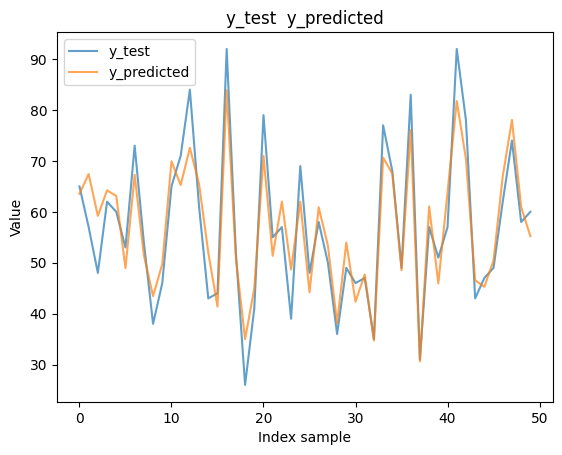

In [33]:
plot_compare(y_test_ndarray, y_predicted_with_5_features)

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [ ]:
x = df_to_numpy(train["Hours Studied"])
x.shape


(9000,)

In [60]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

model_hours_studied = OLSLinearRegression()

mse_model_hours_studied = k_fold_cross_validation(df_to_numpy(train["Hours Studied"]).reshape(-1,1), y_train_ndarray, model_hours_studied)
print("MSE of model with feature Hours Studied: ", mse_model_hours_studied)

MSE of model with feature Hours Studied:  687.1109789087129


In [57]:
model_previous_scores = OLSLinearRegression()

mse_model_previous_scores = k_fold_cross_validation(df_to_numpy(train["Previous Scores"]).reshape(-1,1), y_train_ndarray, model_previous_scores)
print("MSE of model with feature Previous Scores: ", mse_model_previous_scores)

MSE of model with feature Previous Scores:  73.3275107666984


In [63]:
model_extracurricular_activities = OLSLinearRegression()

mse_model_extracurricular_activities = k_fold_cross_validation(df_to_numpy(train["Extracurricular Activities"]).reshape(-1,1), y_train_ndarray, model_extracurricular_activities)
print("MSE of model with extracurricular activities: ", mse_model_extracurricular_activities)

MSE of model with extracurricular activities:  1880.2822255432172


In [66]:
model_sleep_hours = OLSLinearRegression()
mse_model_sleep_hours = k_fold_cross_validation(df_to_numpy(train["Sleep Hours"]).reshape(-1,1), y_train_ndarray, model_sleep_hours)
print("MSE of model with feature Sleep Hours: ", mse_model_sleep_hours)

MSE of model with feature Sleep Hours:  537.3257285080851


In [69]:
model_question_papers_practiced = OLSLinearRegression()
mse_model_question_papers_practiced = k_fold_cross_validation(df_to_numpy(train["Sample Question Papers Practiced"]).reshape(-1,1), y_train_ndarray, model_question_papers_practiced)
print("MSE of model with feature Question Papers Practiced: ", mse_model_question_papers_practiced)

MSE of model with feature Question Papers Practiced:  1180.8105915688272


#### Trung bình MSE khi sử dụng k-fold cross validation

<center>

| STT | Mô hình với 1 đặc trưng 		| MSE  |
|:---:|:-------------------------------:|:----:|
|  1  | Hours Studied			        |687.111|
|  2  | Previous Scores			        | 73.328|
|  3  | Extracurricular Activities		|1880.282|
|  4  | Sleep Hours						| 537.326|
|  5  | Sample Question Papers Practiced|1180.811|

</center>

Chọn đặc trưng `Previous Scores` vì có Mean MSE_val nhỏ nhất

In [85]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_feature_model = OLSLinearRegression().fit(df_to_numpy(train["Previous Scores"]).reshape(-1,1), y_train_ndarray)

best_feature_model_weight = best_feature_model.get_params()
# print(best_feature_model_weight.shape)
print("Weight of best feature model: ", best_feature_model_weight)


Weight of best feature model:  [0.80724882]


In [84]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
y_predicted_best_feature_model = best_feature_model.predict(df_to_numpy(test["Previous Scores"]).reshape(-1,1))
print("MSE: ", cal_mse(y_test_ndarray, y_predicted_best_feature_model))

MSE:  74.97770588681615


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 0.807*PS$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất

## Xây dựng/Thiết kế mô hình

In [37]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [38]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

In [39]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

In [40]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$